In [1]:
from module import dqn

import random

import gym
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
env = gym.make('CartPole-v1', render_mode='human')
# get size of state and action from environment
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

print("State size = ", state_size, "; action size = ", action_size)

State size =  4 ; action size =  2


TRAINING

In [3]:
env = gym.make('CartPole-v1')
# create an agent
agent = dqn.DQNAgent(state_size, action_size, lr=0.001)
# to store the scores and episodes
num_episodes = 10000
scores, avg_scores = [], []
# start training
for e in range(num_episodes):
    done = False
    score = 0
    state = env.reset()
    state = np.reshape(state[0], [1, state_size])

    while not done:
        # get action for the current state and go one step in environment
        action = agent.act(state)
        next_state, reward, done, _, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        # if an action makes the episode end, gives penalty of -100
        if done:
            reward = -100
        # store the data
        agent.store_data(state=state, action=action, reward=reward, next_state=next_state, done=done)
        # train every time step
        agent.learn()
        score += reward
        state = next_state

        if done:
            # score needs to be added by 100 because we punished the last action if done
            score += 100
            scores.append(score)
            avg_scores.append(np.mean(scores[-100:]))
            if e % 20 == 0:
                print("Episode:", e, " -- Score:", score, " -- Avg score:", round(avg_scores[-1], 2))
    
    # stop training if the avg score is above 1000
    if avg_scores[-1] >= 1000:
        print('Training is done ! The average score is above 1000.')
        break
    

Episode: 0  -- Score: 18.0  -- Avg score: 18.0
Episode: 20  -- Score: 14.0  -- Avg score: 18.62
Episode: 40  -- Score: 10.0  -- Avg score: 15.95


/Users/sondinhvan/miniconda3/envs/rl_env/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 60  -- Score: 12.0  -- Avg score: 14.59
Collect enough samples. Start training.
Episode: 80  -- Score: 78.0  -- Avg score: 18.51
Episode: 100  -- Score: 176.0  -- Avg score: 40.87
Episode: 120  -- Score: 149.0  -- Avg score: 72.53
Episode: 140  -- Score: 129.0  -- Avg score: 96.37
Episode: 160  -- Score: 144.0  -- Avg score: 126.14
Episode: 180  -- Score: 177.0  -- Avg score: 163.04
Episode: 200  -- Score: 238.0  -- Avg score: 196.63
Episode: 220  -- Score: 306.0  -- Avg score: 253.2
Episode: 240  -- Score: 1661.0  -- Avg score: 344.76
Episode: 260  -- Score: 1721.0  -- Avg score: 430.04
Training is done ! The average score is above 1000.


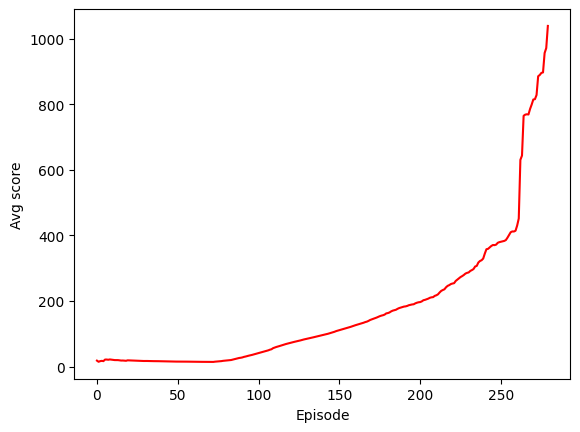

In [4]:
plt.plot(avg_scores, color='red')
plt.xlabel('Episode')
plt.ylabel('Avg score')
plt.savefig('dqn_cartpole_score_over_episodes')

TESTING

In [5]:
env = gym.make('CartPole-v1', render_mode='human')
# start testing
done = False
score = 0
state = env.reset()
state = np.reshape(state[0], [1, state_size])

while not done:
    # get action for the current state and go one step in environment
    action = agent.act(state, evaluate=True)
    next_state, reward, done, _, info = env.step(action)
    next_state = np.reshape(next_state, [1, state_size])
    score += reward
    state = next_state

print(score)

KeyboardInterrupt: 